# Import Libraries and Data

This notebook contains song metadata taken from spotify. The data contains numeric metrics generated by spotify which measure the songs' danceability, mood, liveness, etc as well as the songs' title and artist. This notebook investigates clustering of music based on these features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid
import plotly.graph_objects as go
PLOT = go.Figure()
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer

In [2]:
df = pd.read_csv('C:/Users/imoge/Projects/Datasets/Spotify-2000.csv')

In [3]:
df.shape

(1994, 15)

In [4]:
df.head()

Index                   Title             Artist            Top Genre  \
0      1                 Sunrise        Norah Jones      adult standards   
1      2             Black Night        Deep Purple           album rock   
2      3          Clint Eastwood           Gorillaz  alternative hip hop   
3      4           The Pretender       Foo Fighters    alternative metal   
4      5  Waitin' On A Sunny Day  Bruce Springsteen         classic rock   

   Year  Beats Per Minute (BPM)  Energy  Danceability  Loudness (dB)  \
0  2004                     157      30            53            -14   
1  2000                     135      79            50            -11   
2  2001                     168      69            66             -9   
3  2007                     173      96            43             -4   
4  2002                     106      82            58             -5   

   Liveness  Valence Length (Duration)  Acousticness  Speechiness  Popularity  
0        11       68               201            94            3          71  
1        17       81               207            17            7          39  
2         7       52               341             2           17          69  
3         3       37               269             0            4          76  
4        10       87               256             1            3          59

In [5]:
# Check for nulls
df.isnull().sum()

Index                     0
Title                     0
Artist                    0
Top Genre                 0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

In [6]:
# Check for duplicates
df.duplicated().value_counts()

False    1994
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [8]:
# Drop index column
df = df.drop("Index", axis=1)
df.shape

(1994, 14)

In [9]:
df.describe().T

count         mean        std     min      25%  \
Year                    1994.0  1992.992979  16.116048  1956.0  1979.00   
Beats Per Minute (BPM)  1994.0   120.215647  28.028096    37.0    99.00   
Energy                  1994.0    59.679539  22.154322     3.0    42.00   
Danceability            1994.0    53.238215  15.351507    10.0    43.00   
Loudness (dB)           1994.0    -9.008526   3.647876   -27.0   -11.00   
Liveness                1994.0    19.012036  16.727378     2.0     9.00   
Valence                 1994.0    49.408726  24.858212     3.0    29.00   
Acousticness            1994.0    28.858074  29.011986     0.0     3.00   
Speechiness             1994.0     4.994985   4.401566     2.0     3.00   
Popularity              1994.0    59.526580  14.351600    11.0    49.25   

                           50%      75%     max  
Year                    1993.0  2007.00  2019.0  
Beats Per Minute (BPM)   119.0   136.00   206.0  
Energy                    61.0    78.00   100.0  
Danceability              53.0    64.00    96.0  
Loudness (dB)             -8.0    -6.00    -2.0  
Liveness                  12.0    23.00    99.0  
Valence                   47.0    69.75    99.0  
Acousticness              18.0    50.00    99.0  
Speechiness                4.0     5.00    55.0  
Popularity                62.0    71.00   100.0

In [10]:
df.columns

Index(['Title', 'Artist', 'Top Genre', 'Year', 'Beats Per Minute (BPM)',
       'Energy', 'Danceability', 'Loudness (dB)', 'Liveness', 'Valence',
       'Length (Duration)', 'Acousticness', 'Speechiness', 'Popularity'],
      dtype='object')

In [11]:
# Strip any whitespace from the column - coerce to numeric value
df['Length (Duration)'] = df['Length (Duration)'].str.strip()
df['Length (Duration)'] = pd.to_numeric(df['Length (Duration)'],errors = 'coerce')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   1994 non-null   object 
 1   Artist                  1994 non-null   object 
 2   Top Genre               1994 non-null   object 
 3   Year                    1994 non-null   int64  
 4   Beats Per Minute (BPM)  1994 non-null   int64  
 5   Energy                  1994 non-null   int64  
 6   Danceability            1994 non-null   int64  
 7   Loudness (dB)           1994 non-null   int64  
 8   Liveness                1994 non-null   int64  
 9   Valence                 1994 non-null   int64  
 10  Length (Duration)       1990 non-null   float64
 11  Acousticness            1994 non-null   int64  
 12  Speechiness             1994 non-null   int64  
 13  Popularity              1994 non-null   int64  
dtypes: float64(1), int64(10), object(3)
memo

# Data Analysis

* We would expect there to be clusters based on the music genre

<AxesSubplot:>

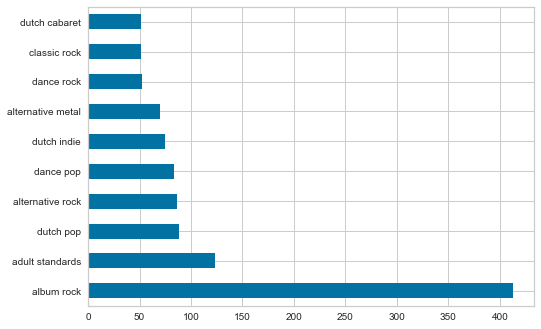

In [13]:
df['Top Genre'].value_counts()[0:10].plot(kind = 'barh')

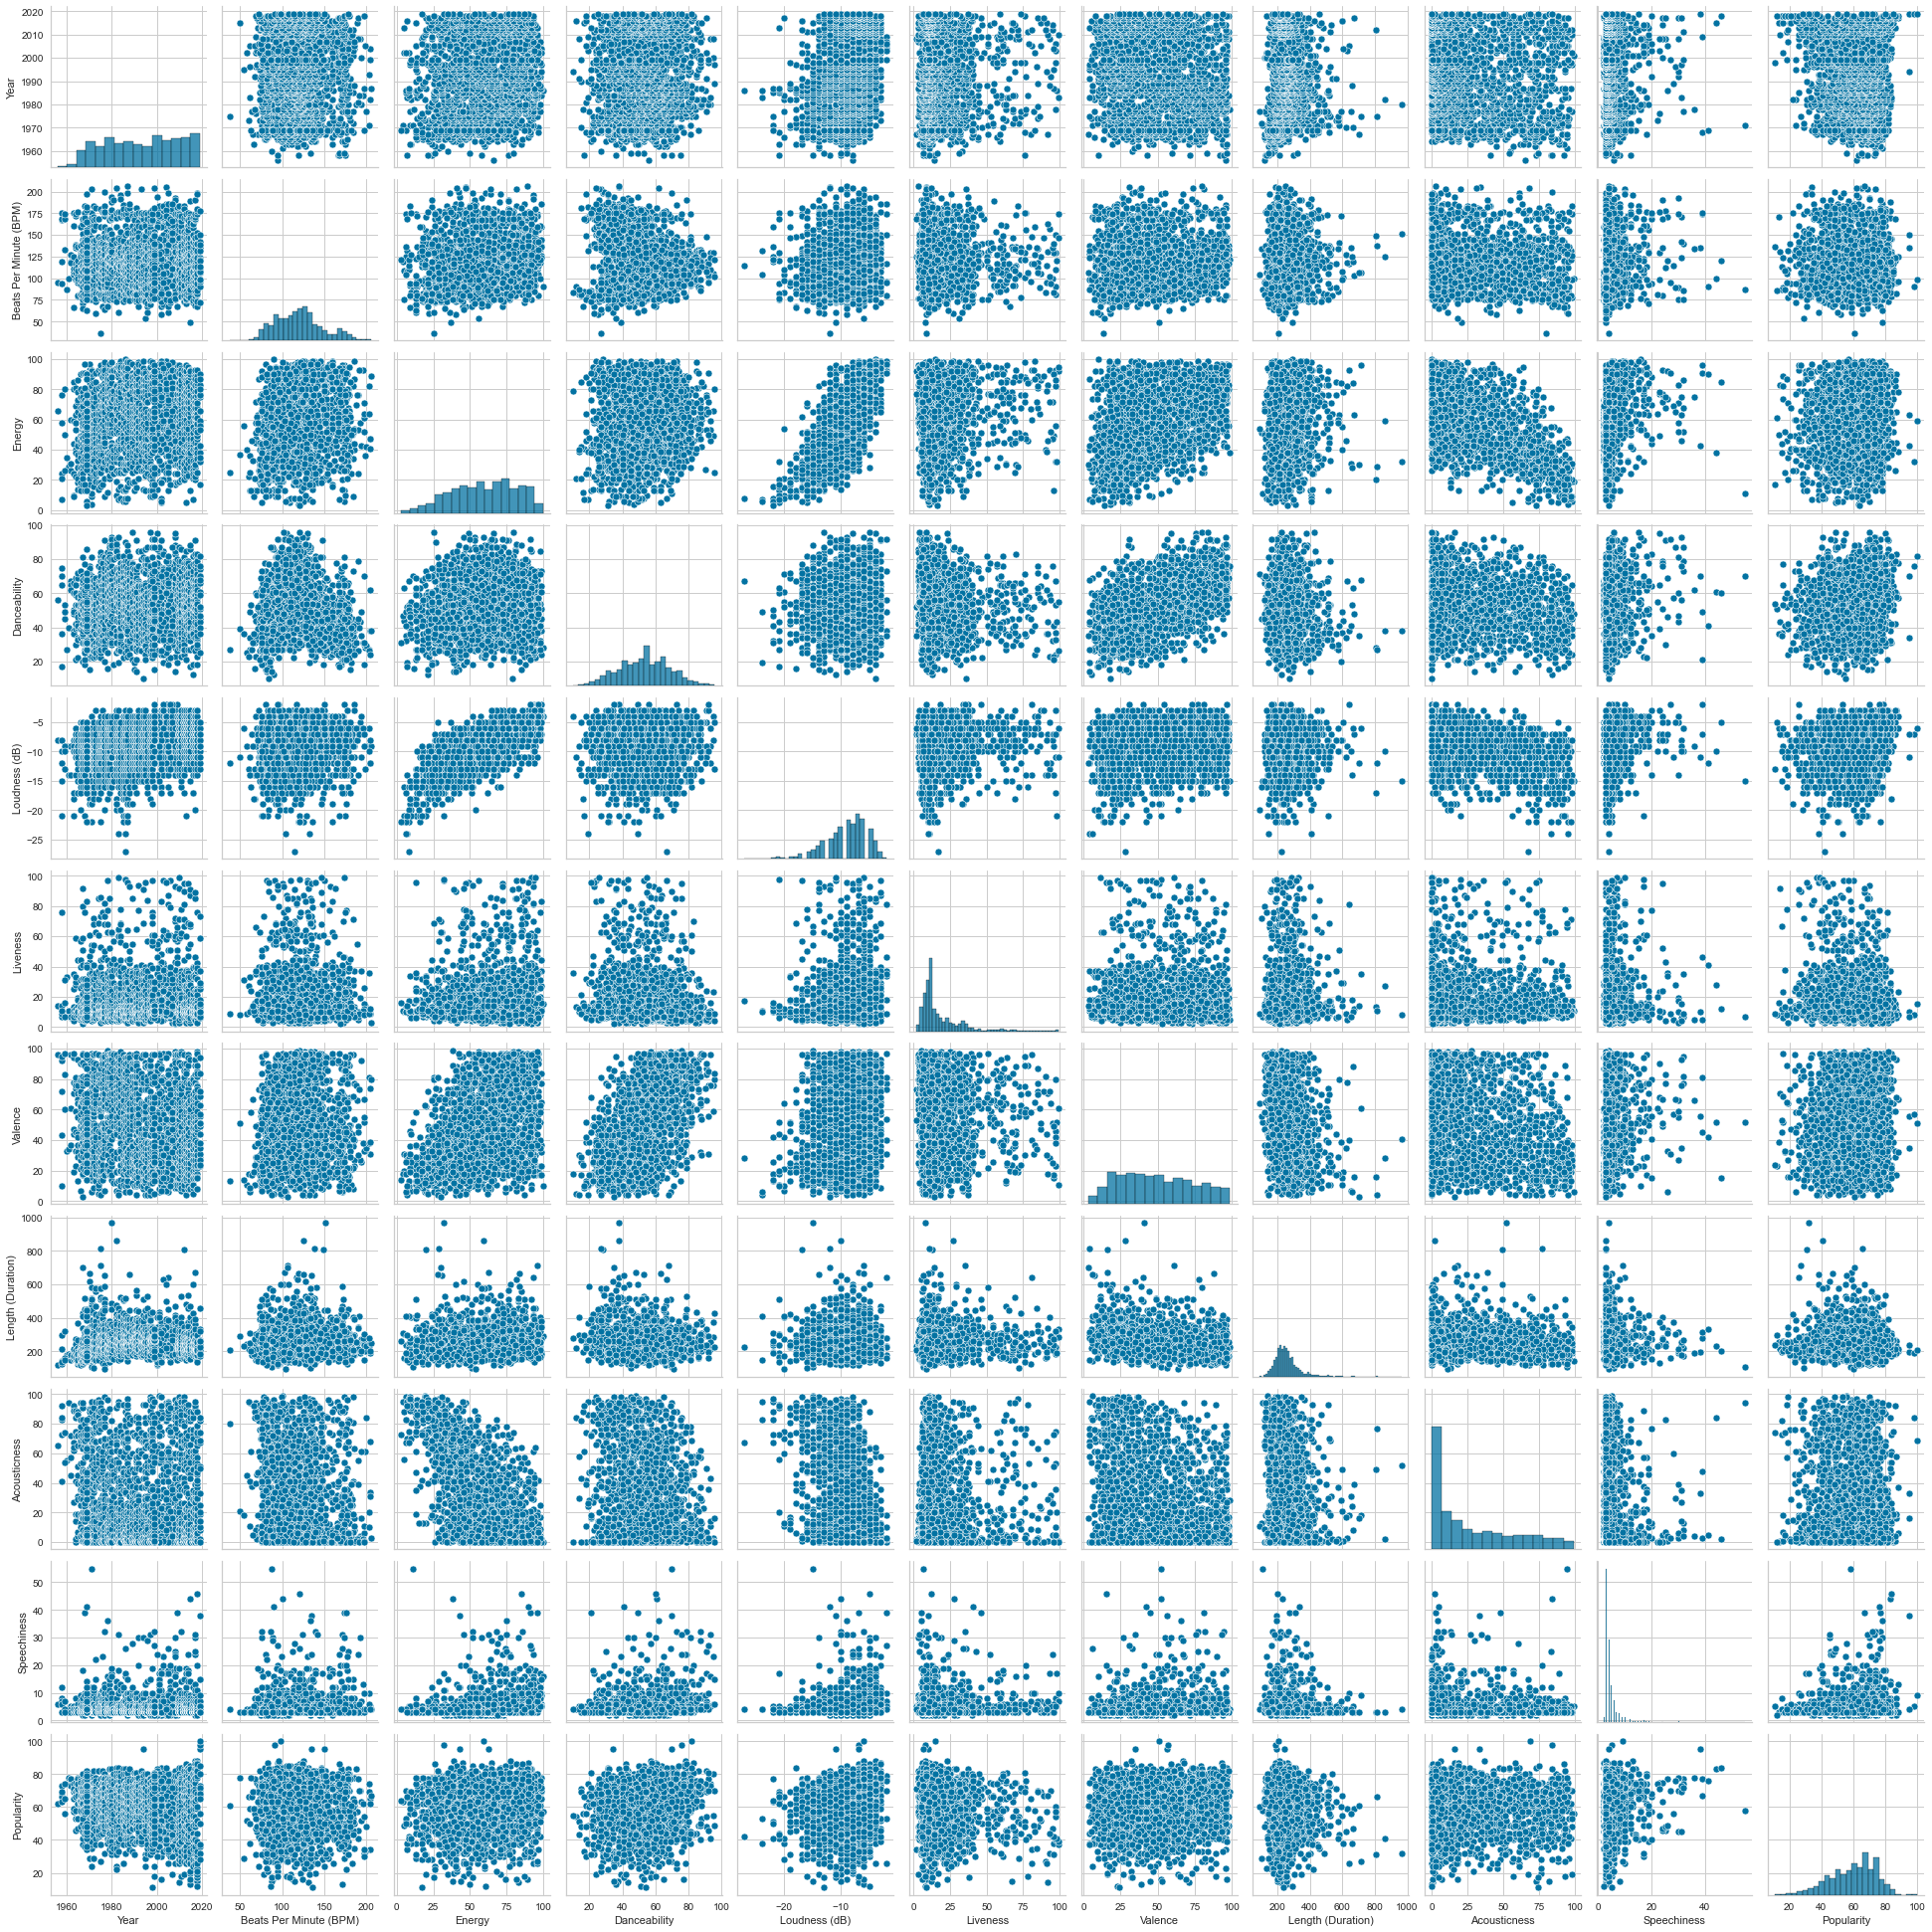

In [14]:
# Plot all the features to look at the distributions
sns.pairplot(data = df)

* Some skew in distributions
* Relationships between some of the features e.g. energy and loudness
* There are some outliers for some features looking at the distributions
* Data will be scaled

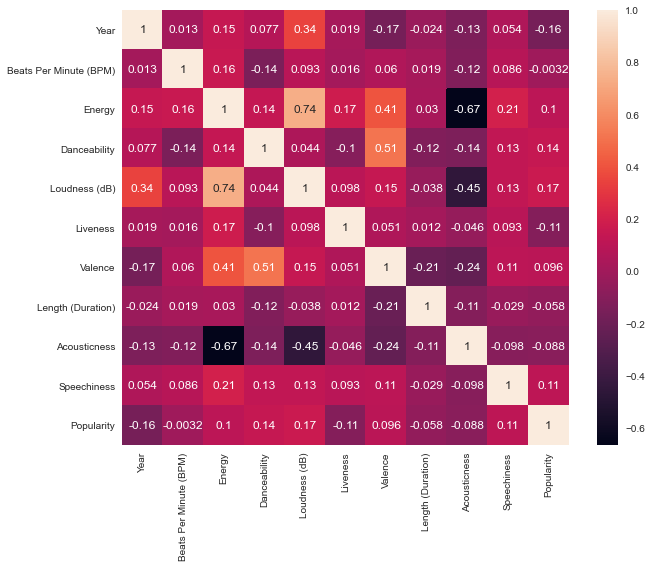

In [15]:
fig, ax = plt.subplots(figsize = (10,8))
sns.heatmap(df.corr(),annot = True);

* Some multi-collinearity with loudness and energy
* Take just one of these features into the model - loudness

# K Means Clustering

In [16]:
df.columns

Index(['Title', 'Artist', 'Top Genre', 'Year', 'Beats Per Minute (BPM)',
       'Energy', 'Danceability', 'Loudness (dB)', 'Liveness', 'Valence',
       'Length (Duration)', 'Acousticness', 'Speechiness', 'Popularity'],
      dtype='object')

In [17]:
# Select some of the features related to sound
df2 = df[["Beats Per Minute (BPM)", "Loudness (dB)", 
          "Liveness", "Valence", "Acousticness", "Speechiness"]]

In [18]:
# Scale the data - don't want negative values so we will use MinMax
scale = MinMaxScaler()
scaled = scale.fit_transform(df2)

In [19]:
scaled.shape

(1994, 6)

In [20]:
# K Means - start with 6 clusters
kmeans = KMeans(n_clusters=6, max_iter = 5000).fit(scaled)
clusters = kmeans.labels_
clusters

array([4, 2, 0, ..., 4, 4, 4])

In [21]:
# Dataframe to show the original features plus the allocated cluster
results = pd.concat([df,pd.Series(clusters)], axis = 1, ignore_index = True)
results.columns = ['Title', 'Artist', 'Top Genre', 'Year', 'Beats Per Minute (BPM)',
       'Energy', 'Danceability', 'Loudness (dB)', 'Liveness', 'Valence',
       'Length (Duration)', 'Acousticness', 'Speechiness', 'Popularity','Cluster'] 
results.head()

Title             Artist            Top Genre  Year  \
0                 Sunrise        Norah Jones      adult standards  2004   
1             Black Night        Deep Purple           album rock  2000   
2          Clint Eastwood           Gorillaz  alternative hip hop  2001   
3           The Pretender       Foo Fighters    alternative metal  2007   
4  Waitin' On A Sunny Day  Bruce Springsteen         classic rock  2002   

   Beats Per Minute (BPM)  Energy  Danceability  Loudness (dB)  Liveness  \
0                     157      30            53            -14        11   
1                     135      79            50            -11        17   
2                     168      69            66             -9         7   
3                     173      96            43             -4         3   
4                     106      82            58             -5        10   

   Valence  Length (Duration)  Acousticness  Speechiness  Popularity  Cluster  
0       68              201.0            94            3          71        4  
1       81              207.0            17            7          39        2  
2       52              341.0             2           17          69        0  
3       37              269.0             0            4          76        0  
4       87              256.0             1            3          59        2

In [22]:
# Get the multi-dimensional vectors for the cluster centres
centroids = kmeans.cluster_centers_
centroids

array([[0.65777392, 0.77781609, 0.14370779, 0.30250239, 0.10934053,
        0.06381479],
       [0.45240913, 0.59719481, 0.13340474, 0.24642857, 0.73076217,
        0.03469738],
       [0.50831113, 0.7580916 , 0.14049343, 0.76763279, 0.09449456,
        0.06798214],
       [0.36134232, 0.74451253, 0.14832151, 0.33260794, 0.11983343,
        0.04456825],
       [0.47800262, 0.69282443, 0.14763516, 0.67696406, 0.5454931 ,
        0.05977243],
       [0.49525607, 0.76172414, 0.71373978, 0.55854885, 0.22753396,
        0.08474301]])

In [23]:
# Evaluate with the Sihouette Score
silhouette_score(scaled,clusters)

0.22563771752532433

This is quite a low score

## Visualise the Clusters

In [24]:
# Credit for code to https://thecleverprogrammer.com/2022/04/05/clustering-music-genres-with-machine-learning/

for i in list(results["Cluster"].unique()):
    

    PLOT.add_trace(go.Scatter3d(x = results[results["Cluster"]== i]['Beats Per Minute (BPM)'],
                                y = results[results["Cluster"] == i]['Energy'],
                                z = results[results["Cluster"] == i]['Danceability'],                        
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(i)))
PLOT.update_traces(hovertemplate='Beats Per Minute (BPM): %{x} <br>Energy: %{y} <br>Danceability: %{z}')

    
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Beats Per Minute (BPM)', titlefont_color = 'black'),
                                yaxis=dict(title = 'Energy', titlefont_color = 'black'),
                                zaxis=dict(title = 'Danceability', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

## Hyperparameter Tuning

The Sihouette score measures:
* how similar an object is to another object in its own cluster
* how different it is to objects in other clusters
* calculates the average score for each sample in the dataset
* +1 indicates perfect clustering and -1 the opposite
* higher if the clusters are dense and well separated from other clusters
* number of clusters may not be obvious

Model inputs, parameters (centroids), hyperparameters (number of clusters etc)

In [25]:
parameters = {'n_clusters':[2,5,10,15]}

In [26]:
parameter_grid = ParameterGrid(parameters)

In [27]:
import os
os.environ["OMP_NUM_THREADS"] = '8'

best_score = -1
model = KMeans()

for g in parameter_grid:
    model.set_params(**g)
    model.fit(scaled)
    
s_score = silhouette_score(scaled,model.labels_)
print('Parameter:', g, 'Score: ', s_score)
if s_score > best_score:
    best_score = s_score
    best_grid = g

Parameter: {'n_clusters': 15} Score:  0.1737956125101127


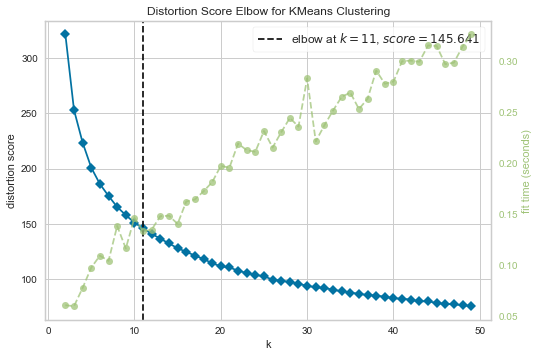

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
visualizer = KElbowVisualizer(model, k=(2,50)) # default metric = 'distortion'

visualizer.fit(scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [32]:
# Evaluate with the Sihouette Score
silhouette_score(scaled,clusters)

0.1846744735471468

In [29]:
# K Means - start with 10 clusters
kmeans = KMeans(n_clusters=11, max_iter = 5000).fit(scaled)
clusters = kmeans.labels_
clusters

array([0, 3, 1, ..., 2, 2, 2])

In [30]:
# Dataframe to show the original features plus the allocated cluster
results = pd.concat([df,pd.Series(clusters)], axis = 1, ignore_index = True)
results.columns = ['Title', 'Artist', 'Top Genre', 'Year', 'Beats Per Minute (BPM)',
       'Energy', 'Danceability', 'Loudness (dB)', 'Liveness', 'Valence',
       'Length (Duration)', 'Acousticness', 'Speechiness', 'Popularity','Cluster'] 
results.head()

Title             Artist            Top Genre  Year  \
0                 Sunrise        Norah Jones      adult standards  2004   
1             Black Night        Deep Purple           album rock  2000   
2          Clint Eastwood           Gorillaz  alternative hip hop  2001   
3           The Pretender       Foo Fighters    alternative metal  2007   
4  Waitin' On A Sunny Day  Bruce Springsteen         classic rock  2002   

   Beats Per Minute (BPM)  Energy  Danceability  Loudness (dB)  Liveness  \
0                     157      30            53            -14        11   
1                     135      79            50            -11        17   
2                     168      69            66             -9         7   
3                     173      96            43             -4         3   
4                     106      82            58             -5        10   

   Valence  Length (Duration)  Acousticness  Speechiness  Popularity  Cluster  
0       68              201.0            94            3          71        0  
1       81              207.0            17            7          39        3  
2       52              341.0             2           17          69        1  
3       37              269.0             0            4          76        1  
4       87              256.0             1            3          59        3

In [31]:
# Credit for code to https://thecleverprogrammer.com/2022/04/05/clustering-music-genres-with-machine-learning/

for i in list(results["Cluster"].unique()):
    

    PLOT.add_trace(go.Scatter3d(x = results[results["Cluster"]== i]['Beats Per Minute (BPM)'],
                                y = results[results["Cluster"] == i]['Energy'],
                                z = results[results["Cluster"] == i]['Danceability'],                        
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(i)))
PLOT.update_traces(hovertemplate='Beats Per Minute (BPM): %{x} <br>Energy: %{y} <br>Danceability: %{z}')

    
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Beats Per Minute (BPM)', titlefont_color = 'black'),
                                yaxis=dict(title = 'Energy', titlefont_color = 'black'),
                                zaxis=dict(title = 'Danceability', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))